# Дипломная работа по курсу python

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import re
import glob

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,5

In [148]:
#Задание 1
HR = pd.read_csv('/Users/alex/Home.work/DataScientist/HR.csv')

In [4]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
#Задание 2
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
HR.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

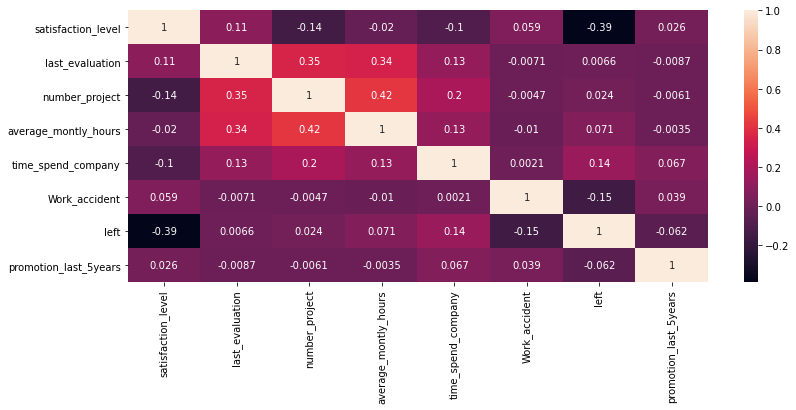

In [8]:
# Задание 3
# самые скоррелированные переменные - number_project и average_montly_hours
# две наименее скоррелированных переменные - Work_accident и time_spend_company


sns.heatmap(HR.corr(), annot = True)

In [9]:
#Задание 4
HR['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [10]:
HR['number_of_staff'] = HR.index

In [12]:
salary_HR = HR[['salary', 'number_of_staff']].groupby('salary').count()

In [13]:
salary_HR

,number_of_staff
salary,
high,1237
low,7316
medium,6446


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам.'}, xlabel='Уровень зарплаты', ylabel='Кол-во сотрудников'>

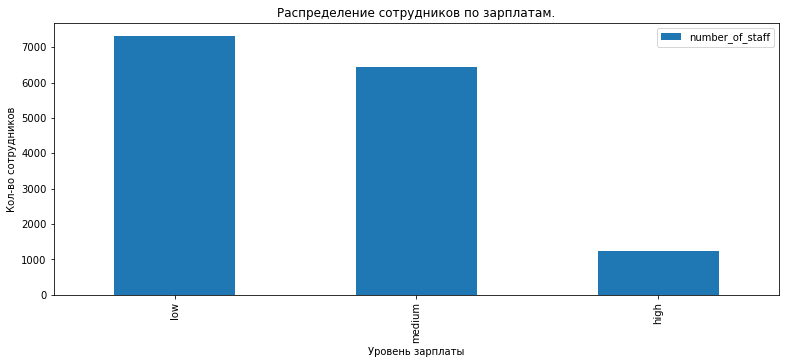

In [14]:
#Задание 5
salary_HR.loc[['low', 'medium', 'high']].plot(kind='bar', 
                                       title='Распределение сотрудников по зарплатам.',
                                       xlabel='Уровень зарплаты',
                                       ylabel='Кол-во сотрудников')

In [15]:
#Задание 6

In [16]:
salary = HR.pivot_table(index='department', columns='salary', aggfunc='size', fill_value=0)

In [17]:
salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [19]:
salary['total'] = salary['low'] + salary['medium'] + salary['high']

<AxesSubplot:xlabel='department'>

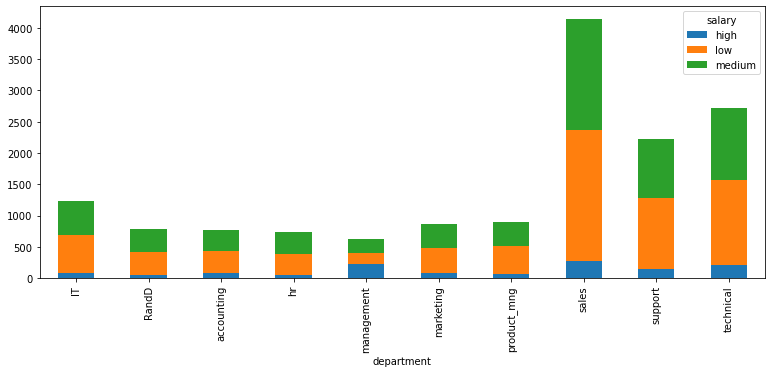

In [20]:
salary.drop('total', axis=1).plot(kind='bar', stacked=True)

In [21]:
#Задание 7

In [22]:
montly_hours = HR[['salary', 'average_montly_hours']].groupby('salary').mean()

In [41]:
montly_hours

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


<AxesSubplot:title={'center':'Кол-во часов на работе'}, xlabel='Уровень зарплаты', ylabel='Кол-во часов'>

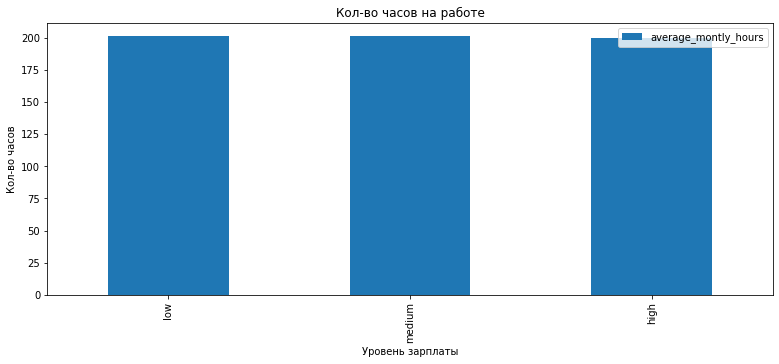

In [23]:
montly_hours.loc[['low', 'medium', 'high']].plot(kind='bar', 
                                       title='Кол-во часов на работе',
                                       xlabel='Уровень зарплаты',
                                       ylabel='Кол-во часов')

In [24]:
low = HR[(HR['salary'] == 'low')]
medium = HR[(HR['salary'] == 'medium')]
high = HR[(HR['salary'] == 'high')]

In [25]:
from scipy.stats import f_oneway
alpha = 0.05
F, p = f_oneway(high['average_montly_hours'], medium['average_montly_hours'], low['average_montly_hours'])
print(p)
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

0.6323271153144614
Одинаковое распределение (не отвергаем H0)


In [ ]:
#Задание 8

In [26]:
HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,number_of_staff
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,3
4,0.37,0.52,2,159,3,0,1,0,sales,low,4
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,14994
14995,0.37,0.48,2,160,3,0,1,0,support,low,14995
14996,0.37,0.53,2,143,3,0,1,0,support,low,14996
14997,0.11,0.96,6,280,4,0,1,0,support,low,14997


In [30]:
HR_resign = HR[(HR['left'] == 1)]
HR_not_resign = HR[(HR['left'] != 1)]

In [51]:
HR_resign['promotion_last_5years'].value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

In [31]:
HR_not_resign['promotion_last_5years'].value_counts()

0    11128
1      300
Name: promotion_last_5years, dtype: int64

In [53]:
HR_resign['promotion_last_5years'].value_counts().loc[1] / len(HR_resign)

0.005320638476617194

In [54]:
HR_not_resign['promotion_last_5years'].value_counts().loc[1] / len(HR_resign)

0.08401008120974517

In [57]:
HR_resign['satisfaction_level'].mean()

0.44009801176140917

In [58]:
HR_not_resign['satisfaction_level'].mean()

0.666809590479516

In [59]:
HR_resign['number_project'].mean()

3.8555026603192384

In [60]:
HR_not_resign['number_project'].mean()

3.786664333216661

In [ ]:
#Задание 9

In [85]:
HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [150]:
y = HR['left'].tolist()

In [97]:
from sklearn.model_selection import train_test_split

In [149]:
"""
Пришлось переименовать названия отделов в цифры.

sales          1
technical      2
support        3
IT             4
product_mng    5
marketing      6
RandD          7
accounting     8
hr             9
management     10

"""

def my_funcion_1(column): 
    if column['department'] == 'sales' :
        return 1
    if column['department'] == 'technical' :
        return 2
    if column['department'] == 'support' :
        return 3
    if column['department'] == 'IT' :
        return 4
    if column['department'] == 'product_mng' :
        return 5
    if column['department'] == 'marketing' :
        return 6
    if column['department'] == 'RandD' :
        return 7
    if column['department'] == 'accounting' :
        return 8
    if column['department'] == 'hr' :
        return 9
    if column['department'] == 'management' :
        return 10

HR['department'] = HR.apply(my_funcion_1, axis=1) 

In [151]:
def my_funcion(column): 
    if column['salary'] == 'low' :
        return 1
    if column['salary'] == 'medium' :
        return 2
    if column['salary'] == 'high' :
        return 3

HR['salary'] = HR.apply(my_funcion, axis=1) 

In [152]:
HR.drop('left', axis=1, inplace=True)

In [153]:
x = HR

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [155]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [156]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [157]:
lda.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
result = pd.DataFrame([y_test, lda.predict(x_test)]).T

In [159]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,0,0
3747,0,0
3748,0,0


In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
#через матрицу можно посмотреть кол-во ошибок
confusion_matrix(y_test, lda.predict(x_test))

array([[2603,  208],
       [ 659,  280]])